# 1.0    Data collection of the top 20 stocks in NYSE

In [122]:
# Importing the libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# Fetching S&P 500 tickers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
sp500 = tables[0]  # The first table contains the S&P 500 tickers

# Extract the ticker symbols from the first column
tickers = sp500['Symbol'].tolist()

In [124]:
# Function to fetch market cap using yfinance
def fetch_market_cap(ticker):
    stock = yf.Ticker(ticker)
    try:
        # Return the market cap if it exists in the info dictionary
        market_cap = stock.info.get('marketCap', None)
        return market_cap
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")
        return None

In [125]:
# Dictionary to store tickers and their market caps
market_caps = {}

# Loop through each ticker and fetch market cap
for ticker in tickers:
    market_cap = fetch_market_cap(ticker)
    if market_cap:
        market_caps[ticker] = market_cap
    else:
        print(f"Market cap data not available for {ticker}")

# Sort the tickers by market cap in descending order
sorted_market_caps = sorted(market_caps.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 tickers by market cap
top_20_tickers = sorted_market_caps[:20]

# Print the top 20 tickers and their market caps
for ticker, market_cap in top_20_tickers:
    print(f"{ticker}: {market_cap}")


Market cap data not available for BRK.B
Market cap data not available for BF.B
AAPL: 3654327468032
NVDA: 3479784128512
MSFT: 3148969148416
GOOG: 2403536470016
GOOGL: 2400735985664
AMZN: 2345476030464
META: 1566420762624
TSLA: 1265758765056
AVGO: 1084186361856
WMT: 731681193984
LLY: 695297179648
JPM: 688477306880
V: 605640720384
XOM: 480515194880
MA: 471384227840
UNH: 470702292992
ORCL: 454785728512
COST: 407960944640
HD: 381888462848
PG: 379067269120


In [126]:
# List of top 20 tickers based on the market cap values
ticker_list = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO', 'WMT', 
               'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG']

# Download stock data directly from yfinance
df = yf.download(ticker_list, start='2013-01-01', end="2023-12-31")

# Create a copy of the dataframe
data = df.copy()

# Reshape data to a more manageable format
data = data.stack().reset_index()
data.columns.names = [None]

# Drop the 'Close' column if not needed
data = data.drop(['Close'], axis=1)

# Display the first few rows
data.head()


[*********************100%***********************]  20 of 20 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_19676\1023733595.py:12: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack().reset_index()


,Date,Ticker,Adj Close,High,Low,Open,Volume
0,2013-01-02 00:00:00+00:00,AAPL,16.687349,19.821428,19.343929,19.779285,560518000
1,2013-01-02 00:00:00+00:00,AMZN,12.865500,12.905000,12.663000,12.804000,65420000
2,2013-01-02 00:00:00+00:00,AVGO,2.389274,3.306000,3.224000,3.243000,36716000
3,2013-01-02 00:00:00+00:00,COST,80.408707,101.449997,100.209999,100.599998,3153800
4,2013-01-02 00:00:00+00:00,GOOG,17.949236,18.107130,17.846855,17.918339,102033017


# Data validation and cleaning

In [128]:
data.columns = ['date','tick','close','high','low','open','volume']

In [129]:
data.columns

Index(['date', 'tick', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

In [130]:
data.head()

,date,tick,close,high,low,open,volume
0,2013-01-02 00:00:00+00:00,AAPL,16.687349,19.821428,19.343929,19.779285,560518000
1,2013-01-02 00:00:00+00:00,AMZN,12.865500,12.905000,12.663000,12.804000,65420000
2,2013-01-02 00:00:00+00:00,AVGO,2.389274,3.306000,3.224000,3.243000,36716000
3,2013-01-02 00:00:00+00:00,COST,80.408707,101.449997,100.209999,100.599998,3153800
4,2013-01-02 00:00:00+00:00,GOOG,17.949236,18.107130,17.846855,17.918339,102033017


In [131]:
# check for missing values
data.isna().sum()

date      0
tick      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [132]:
# Handling the date column to reduce complication

data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

print(data.date)

0        2013-01-02
1        2013-01-02
2        2013-01-02
3        2013-01-02
4        2013-01-02
            ...    
55355    2023-12-29
55356    2023-12-29
55357    2023-12-29
55358    2023-12-29
55359    2023-12-29
Name: date, Length: 55360, dtype: object


In [133]:
# check if all tickers have the same number of data points
no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tick']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [134]:
data_points_df.columns = ['tick', 'no_of_data_points']
data_points_df.head()

,tick,no_of_data_points
0,AAPL,2768
1,NVDA,2768
2,MSFT,2768
3,AMZN,2768
4,GOOGL,2768


In [135]:
# cehcking data type of each columns to ensure data consistency
print(data.dtypes)

date       object
tick       object
close     float64
high      float64
low       float64
open      float64
volume      int64
dtype: object


In [136]:
# changing the date format to datetime for future use
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)

date      datetime64[ns]
tick              object
close            float64
high             float64
low              float64
open             float64
volume             int64
dtype: object


# Data Exploration and visualisation

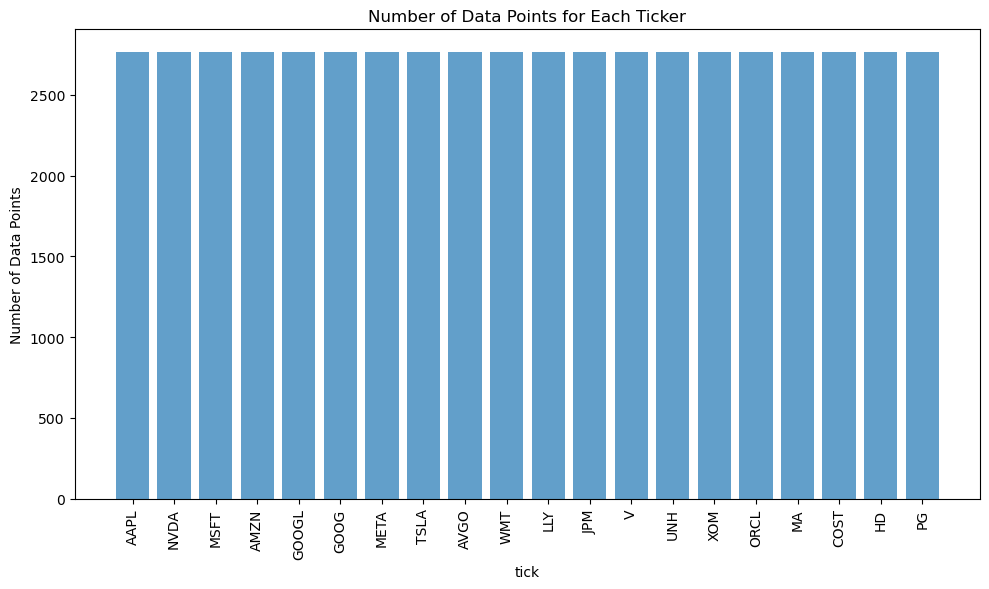

In [138]:
# Plot a bar chart to check that all tickers have the same number of data points
plt.figure(figsize=(10, 6))  # Adjusted figure size for better visibility
plt.bar(data_points_df['tick'], data_points_df['no_of_data_points'], alpha=0.7)
plt.xticks(rotation=90)  # Rotate ticker labels for better readability
plt.title('Number of Data Points for Each Ticker')
plt.xlabel('tick')
plt.ylabel('Number of Data Points')
plt.tight_layout()  # Ensures labels do not get cut off
plt.show()


In [139]:
data.head()

,date,tick,close,high,low,open,volume
0,2013-01-02,AAPL,16.687349,19.821428,19.343929,19.779285,560518000
1,2013-01-02,AMZN,12.865500,12.905000,12.663000,12.804000,65420000
2,2013-01-02,AVGO,2.389274,3.306000,3.224000,3.243000,36716000
3,2013-01-02,COST,80.408707,101.449997,100.209999,100.599998,3153800
4,2013-01-02,GOOG,17.949236,18.107130,17.846855,17.918339,102033017


In [140]:
#save to csv file
data.to_csv('datasets/top20stockdata.csv', index=False)

In [141]:
# # read the data from the saved csv file
# # Load dataset
# data = pd.read_csv("./datasets/top20stockdata.csv")

In [142]:
# information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55360 entries, 0 to 55359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    55360 non-null  datetime64[ns]
 1   tick    55360 non-null  object        
 2   close   55360 non-null  float64       
 3   high    55360 non-null  float64       
 4   low     55360 non-null  float64       
 5   open    55360 non-null  float64       
 6   volume  55360 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.0+ MB
None
                                date         close          high  \
count                          55360  55360.000000  55360.000000   
mean   2018-07-01 05:52:11.791907584    108.041624    116.504873   
min              2013-01-02 00:00:00      0.276439      0.303500   
25%              2015-09-30 18:00:00     37.007626     40.660000   
50%              2018-06-30 12:00:00     69.635971     82.540001   
75

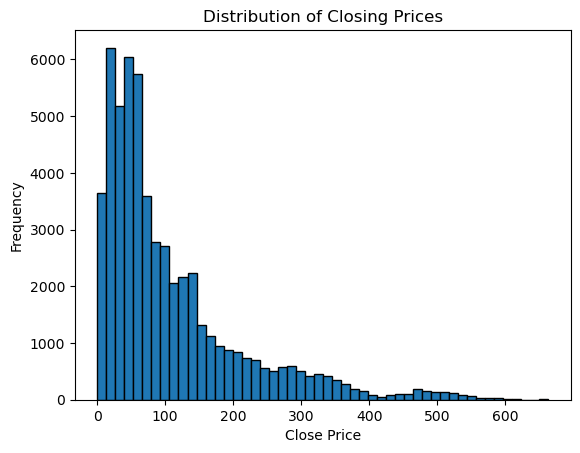

In [145]:
# Distribution of closing prices
plt.hist(data['close'], bins=50, edgecolor='black')
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

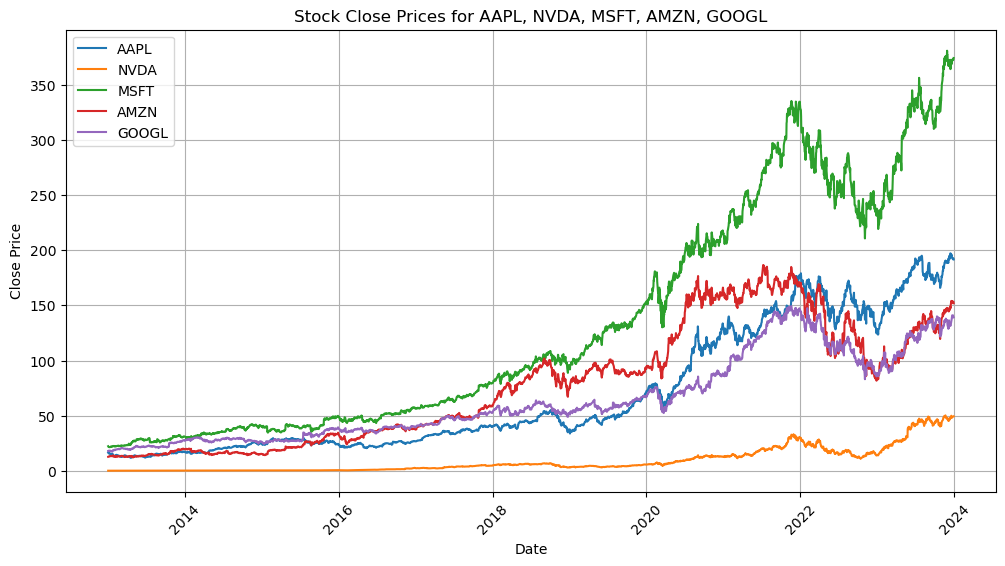

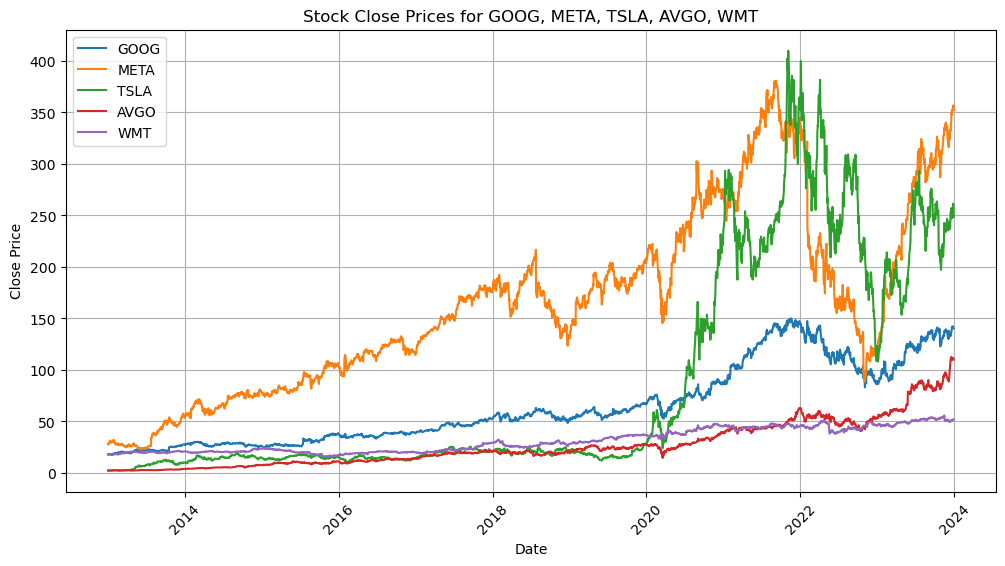

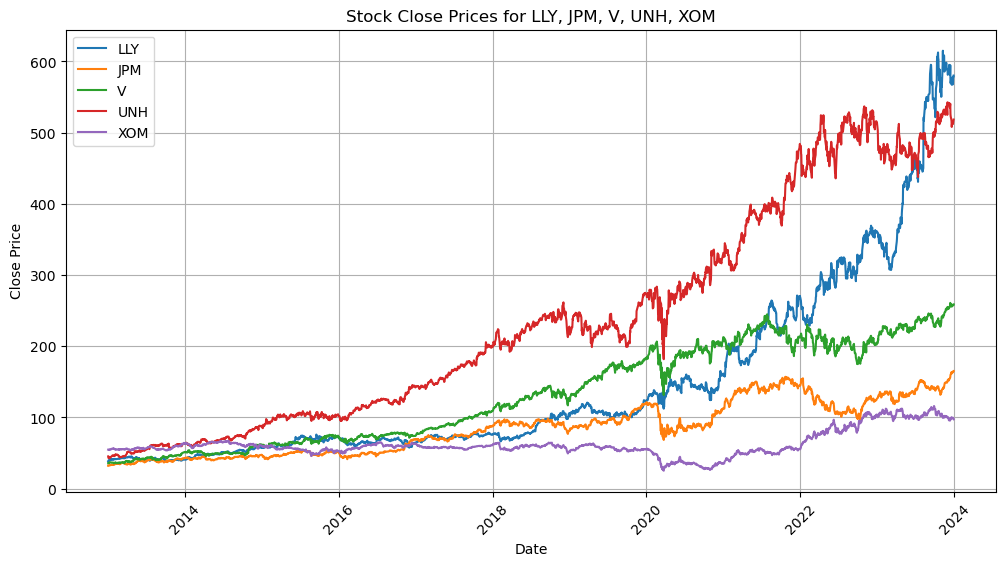

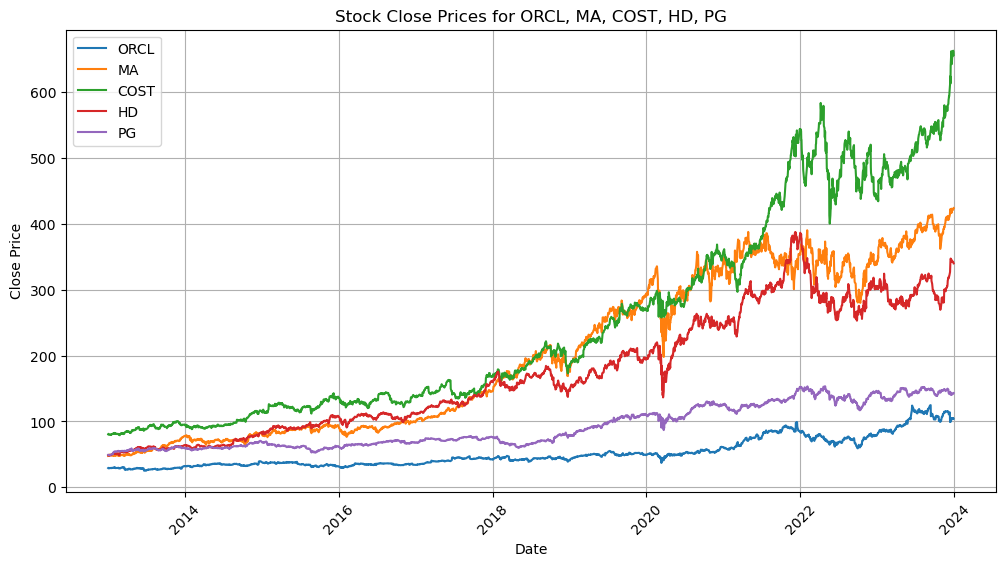

In [157]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and is properly loaded
stocks = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO', 'WMT',
          'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG']

# Function to plot timeseries of close prices for stocks in groups of five
def plot_stocks(data, stock_list, group_size=5):
    for i in range(0, len(stock_list), group_size):
        stock_group = stock_list[i:i + group_size]
        plt.figure(figsize=(12, 6))
        for stock in stock_group:
            stock_data = data[data['tick'] == stock]
            plt.plot(stock_data['date'], stock_data['close'], label=stock)
        plt.title(f"Stock Close Prices for {', '.join(stock_group)}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

# Call the function
plot_stocks(data, stocks, group_size=5)


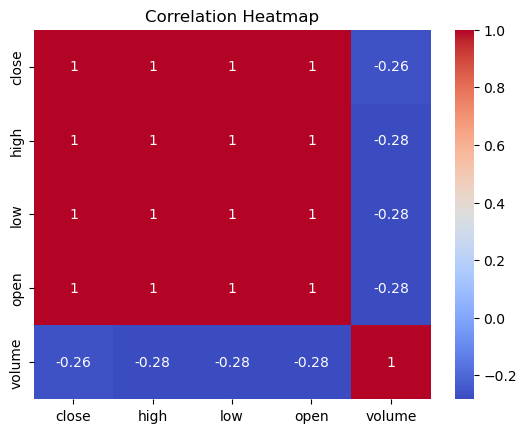

In [162]:
import seaborn as sns
# Correlation heatmap of numerical columns
correlation = data[['close', 'high', 'low', 'open', 'volume']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [164]:
# Group by 'tick' to check average statistics
print(data.groupby('tick').mean())

                               date       close        high         low  \
tick                                                                      
AAPL  2018-07-01 05:52:11.791907328   70.056227   73.092193   71.567077   
AMZN  2018-07-01 05:52:11.791907328   78.078527   79.006802   77.114984   
AVGO  2018-07-01 05:52:11.791907328   26.736735   30.305868   29.558851   
COST  2018-07-01 05:52:11.791907328  248.554649  271.963569  267.364075   
GOOG  2018-07-01 05:52:11.791907328   64.529631   65.408672   64.085334   
GOOGL 2018-07-01 05:52:11.791907328   64.637643   65.525683   64.183536   
HD    2018-07-01 05:52:11.791907328  173.981962  197.245451  193.646225   
JPM   2018-07-01 05:52:11.791907328   85.185137   99.985159   98.156196   
LLY   2018-07-01 05:52:11.791907328  146.124395  156.592406  153.254014   
MA    2018-07-01 05:52:11.791907328  203.173535  210.716600  206.462589   
META  2018-07-01 05:52:11.791907328  164.513952  167.192977  162.999104   
MSFT  2018-07-01 05:52:11

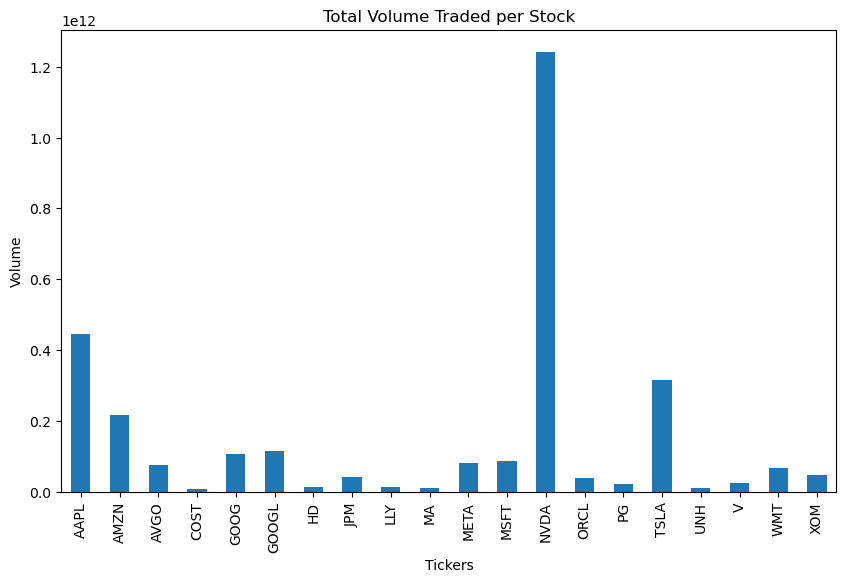

In [167]:
# Volume traded per stock
data.groupby('tick')['volume'].sum().plot(kind='bar', figsize=(10, 6))
plt.title("Total Volume Traded per Stock")
plt.xlabel("Tickers")
plt.ylabel("Volume")
plt.show()

In [175]:
# # Moving average for a specific stock
# stock_data['MA_10'] = stock_data['close'].rolling(window=10).mean()
# plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
# plt.plot(stock_data['date'], stock_data['MA_10'], label='10-Day MA')
# plt.title("AAPL Closing Prices with Moving Average")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [181]:
# create a list for dates with all ticker data points
date_list = list(data[data['tick']=='V'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [184]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tick']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [186]:
data_points_df.head()

,0,1
0,AAPL,2768
1,NVDA,2768
2,MSFT,2768
3,AMZN,2768
4,GOOGL,2768


In [188]:
data_filtered.head()

,date,tick,close,high,low,open,volume
0,2013-01-02,AAPL,16.687349,19.821428,19.343929,19.779285,560518000
1,2013-01-02,AMZN,12.865500,12.905000,12.663000,12.804000,65420000
2,2013-01-02,AVGO,2.389274,3.306000,3.224000,3.243000,36716000
3,2013-01-02,COST,80.408707,101.449997,100.209999,100.599998,3153800
4,2013-01-02,GOOG,17.949236,18.107130,17.846855,17.918339,102033017


# Creation of stock's close price table

In [194]:
# read the data from the saved csv file
df_prices = pd.read_csv('./datasets/top20stockdata.csv')

In [196]:
# Reset the Index to tick and date
df_prices = df_prices.reset_index().set_index(['tick', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [198]:
len(tic_list)

20

In [211]:
# Reset the Index to 'tick' and 'date', ensuring 'date' is in datetime format
df_prices = df_prices.reset_index()
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices = df_prices.set_index(['tick', 'date']).sort_index()

# Get the list of all the unique tickers
tick_list = df_prices.index.get_level_values('tick').unique()

# Create an empty dataframe for the close prices
df_close = pd.DataFrame()

# Fetch close prices for each ticker in the list
for ticker in tick_list:
 df_close[ticker] = df_prices.xs(ticker).close
    
# Reset the index for the close prices dataframe and set 'date' as the index
df_close = df_close.reset_index().set_index('date')

# Display the first few rows of df_close
df_close.head()


,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,
2013-01-02,16.687349,12.8655,2.389274,80.408707,17.949236,18.033974,48.451302,32.147221,38.239769,47.532600,27.893452,22.451813,0.293515,29.126837,49.248260,2.357333,45.363483,35.736614,17.991377,54.759365
2013-01-03,16.476706,12.9240,2.401755,81.233025,17.959660,18.044447,48.313919,32.082424,38.401978,47.600609,27.664326,22.151041,0.293745,28.807774,48.935986,2.318000,43.242527,35.764236,17.877048,54.660568
2013-01-04,16.017754,12.9575,2.386337,80.971497,18.314550,18.401014,48.222317,32.651100,39.823132,47.598743,28.650557,21.736473,0.303437,29.059660,49.035347,2.293333,43.325699,36.056313,17.944614,54.913673
2013-01-07,15.923542,13.4230,2.373120,80.345306,18.234638,18.320723,47.962822,32.687084,39.769066,48.423618,29.308046,21.695833,0.294668,28.908525,48.701763,2.289333,43.325699,36.313908,17.773119,54.277859
2013-01-08,15.966391,13.3190,2.356967,80.194717,18.198652,18.284569,48.252857,32.751873,40.070286,48.264256,28.949417,21.582027,0.288207,28.916922,48.623692,2.245333,42.751797,36.652008,17.822485,54.617374


In [214]:
# Exploratory Data Analysis
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2768.0,70.056227,56.618224,11.939037,25.060906,41.713120,127.034456,197.144196
AMZN,2768.0,78.078527,52.929354,12.411500,26.680125,80.149502,120.954998,186.570496
AVGO,2768.0,26.736735,22.096735,2.307491,9.888085,20.024856,42.195910,112.657578
COST,2768.0,248.554649,153.475749,79.033920,125.086395,186.062195,355.384064,662.928406
GOOG,2768.0,64.529631,37.917258,17.443457,32.464975,53.928230,93.832848,150.169434
GOOGL,2768.0,64.637643,37.326324,17.525805,33.924895,54.277243,93.540909,149.297287
HD,2768.0,173.981962,90.562168,47.962822,95.154194,158.197319,260.335663,387.562653
JPM,2768.0,85.185137,36.483358,32.082424,48.387097,86.419868,114.878784,165.473587
LLY,2768.0,146.124395,129.175223,37.810452,64.074570,78.674889,191.823204,614.997742
MA,2768.0,203.173535,119.868520,47.507412,87.412783,186.313652,328.139915,424.057068


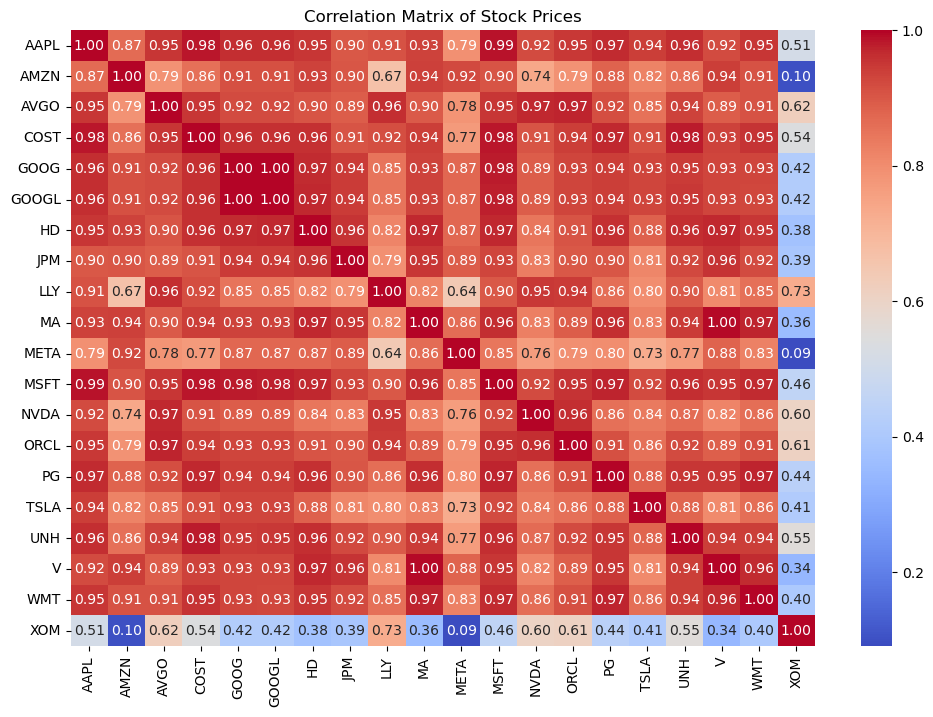

In [218]:
import seaborn as sns
correlation_matrix = df_close.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Stock Prices")
plt.show()

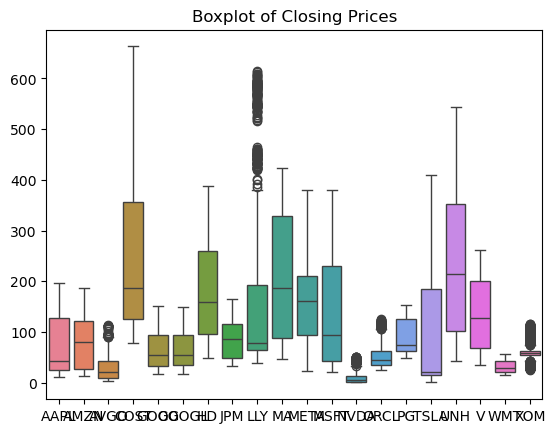

In [249]:
# Check outliers using boxplot
sns.boxplot(df_close)
plt.title("Boxplot of Closing Prices")
plt.show()

In [220]:
# Reset the index and move the current index (i.e., 'date') back to a column
df_close = df_close.reset_index()
print(df_close.head(2))

        date       AAPL     AMZN      AVGO       COST       GOOG      GOOGL  \
0 2013-01-02  16.687349  12.8655  2.389274  80.408707  17.949236  18.033974   
1 2013-01-03  16.476706  12.9240  2.401755  81.233025  17.959660  18.044447   

          HD        JPM        LLY  ...       META       MSFT      NVDA  \
0  48.451302  32.147221  38.239769  ...  27.893452  22.451813  0.293515   
1  48.313919  32.082424  38.401978  ...  27.664326  22.151041  0.293745   

        ORCL         PG      TSLA        UNH          V        WMT        XOM  
0  29.126837  49.248260  2.357333  45.363483  35.736614  17.991377  54.759365  
1  28.807774  48.935986  2.318000  43.242527  35.764236  17.877048  54.660568  

[2 rows x 21 columns]


In [222]:
# Display the rows of df_close
df_close.head(5)

,date,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
0,2013-01-02,16.687349,12.8655,2.389274,80.408707,17.949236,18.033974,48.451302,32.147221,38.239769,...,27.893452,22.451813,0.293515,29.126837,49.248260,2.357333,45.363483,35.736614,17.991377,54.759365
1,2013-01-03,16.476706,12.9240,2.401755,81.233025,17.959660,18.044447,48.313919,32.082424,38.401978,...,27.664326,22.151041,0.293745,28.807774,48.935986,2.318000,43.242527,35.764236,17.877048,54.660568
2,2013-01-04,16.017754,12.9575,2.386337,80.971497,18.314550,18.401014,48.222317,32.651100,39.823132,...,28.650557,21.736473,0.303437,29.059660,49.035347,2.293333,43.325699,36.056313,17.944614,54.913673
3,2013-01-07,15.923542,13.4230,2.373120,80.345306,18.234638,18.320723,47.962822,32.687084,39.769066,...,29.308046,21.695833,0.294668,28.908525,48.701763,2.289333,43.325699,36.313908,17.773119,54.277859
4,2013-01-08,15.966391,13.3190,2.356967,80.194717,18.198652,18.284569,48.252857,32.751873,40.070286,...,28.949417,21.582027,0.288207,28.916922,48.623692,2.245333,42.751797,36.652008,17.822485,54.617374


In [227]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,min,25%,50%,75%,max,std
date,2768,2018-07-01 05:52:11.791907584,2013-01-02 00:00:00,2015-09-30 18:00:00,2018-06-30 12:00:00,2021-03-31 06:00:00,2023-12-29 00:00:00,NaN
AAPL,2768.0,70.056227,11.939037,25.060906,41.71312,127.034456,197.144196,56.618224
AMZN,2768.0,78.078527,12.4115,26.680125,80.149502,120.954998,186.570496,52.929354
AVGO,2768.0,26.736735,2.307491,9.888085,20.024856,42.19591,112.657578,22.096735
COST,2768.0,248.554649,79.03392,125.086395,186.062195,355.384064,662.928406,153.475749
GOOG,2768.0,64.529631,17.443457,32.464975,53.92823,93.832848,150.169434,37.917258
GOOGL,2768.0,64.637643,17.525805,33.924895,54.277243,93.540909,149.297287,37.326324
HD,2768.0,173.981962,47.962822,95.154194,158.197319,260.335663,387.562653,90.562168
JPM,2768.0,85.185137,32.082424,48.387097,86.419868,114.878784,165.473587,36.483358
LLY,2768.0,146.124395,37.810452,64.07457,78.674889,191.823204,614.997742,129.175223


In [229]:
# Save the Close Price datase
df_close.to_csv('datasets/close_prices.csv', index=False)


In [233]:
%store df_close

Stored 'df_close' (DataFrame)


In [ ]:
# creating tickerlist that can be used in the next extraction

In [231]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [235]:
ticker_list = df_close_full_stocks.columns

In [237]:
print(ticker_list)

Index(['date', 'AAPL', 'AMZN', 'AVGO', 'COST', 'GOOG', 'GOOGL', 'HD', 'JPM',
       'LLY', 'MA', 'META', 'MSFT', 'NVDA', 'ORCL', 'PG', 'TSLA', 'UNH', 'V',
       'WMT', 'XOM'],
      dtype='object')
